# Explore here

In [46]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df = pd.DataFrame(df)
print("Dimensiones del DataFrame:", df.shape)

df.info()

Dimensiones del DataFrame: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.drop_duplicates(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
# Análisis univariante
print("Estadísticas descriptivas:" )
df.describe()

Estadísticas descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Variables categóricas y numéricas
categorica = ['Outcome']
numerica = [col for col in df.columns if col != 'Outcome']
print("Variables categóricas:", categorica)
print("Variables numéricas:", numerica)



Variables categóricas: ['Outcome']
Variables numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


In [64]:
for col in numerica:
    # Calcular la media excluyendo los ceros
    media = df[df[col] != 0][col].mean()
    # Reemplazar los ceros por la media calculada
    df[col] = df[col].replace(0, media)
    df[col] = df[col].astype(float)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0     6.000000    148.0           72.0       35.00000  155.548223  33.6   
1     1.000000     85.0           66.0       29.00000  155.548223  26.6   
2     8.000000    183.0           64.0       29.15342  155.548223  23.3   
3     1.000000     89.0           66.0       23.00000   94.000000  28.1   
4     4.494673    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  


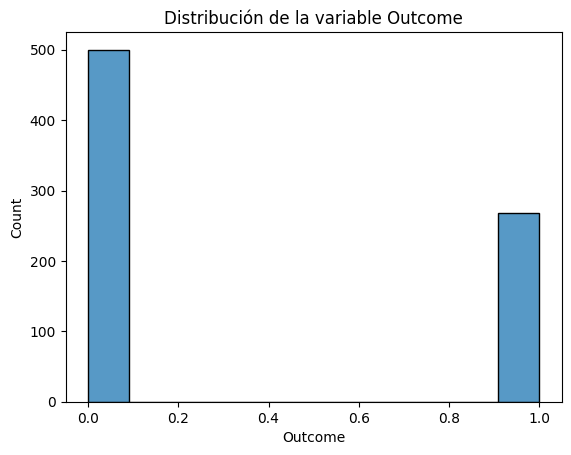

In [65]:
# Analisis de las variables categóricas
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = df, x ='Outcome')
plt.title('Distribución de la variable Outcome')
plt.show()


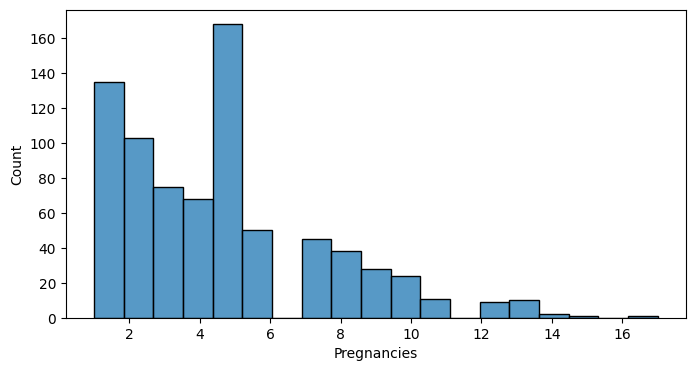

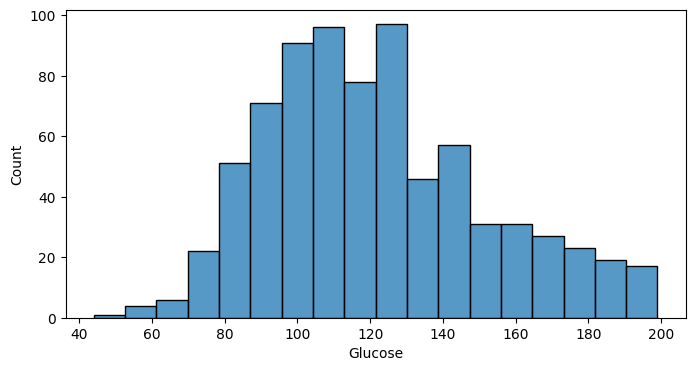

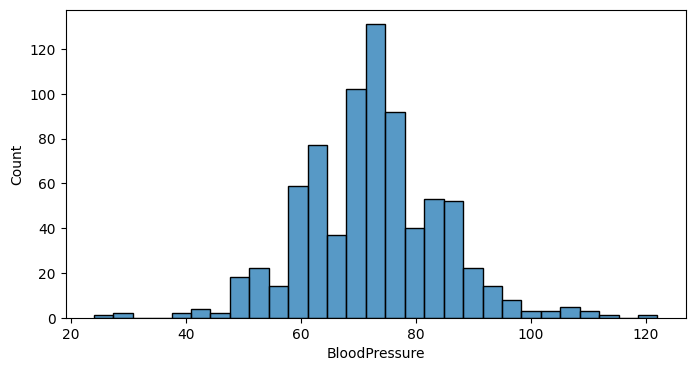

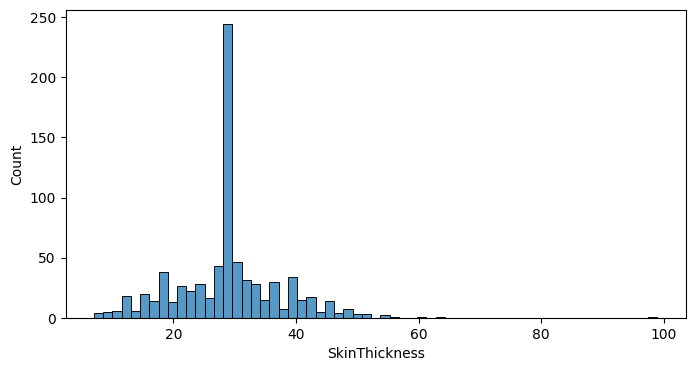

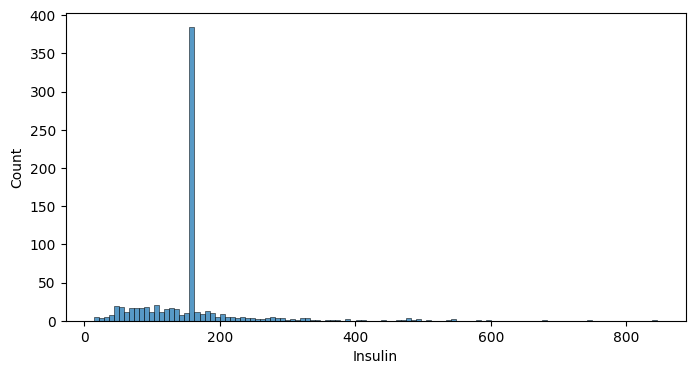

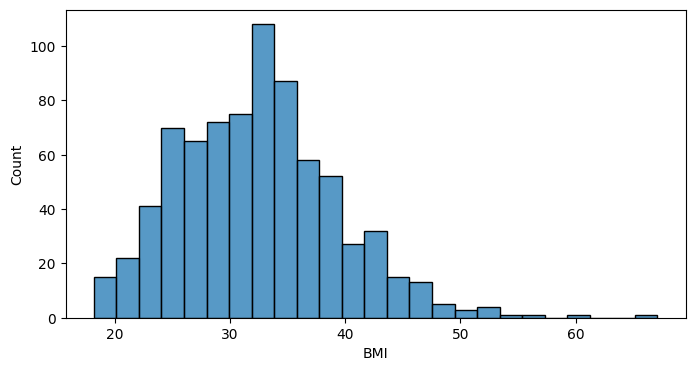

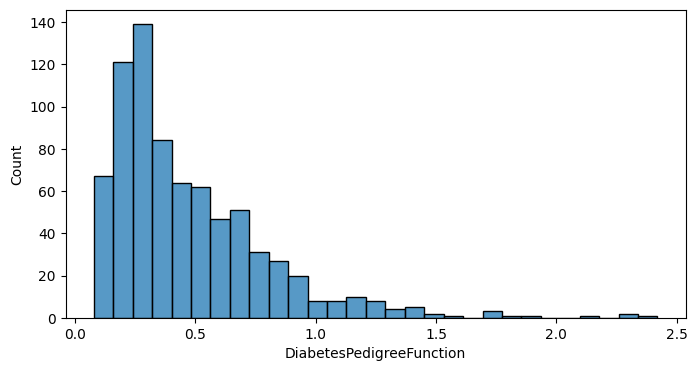

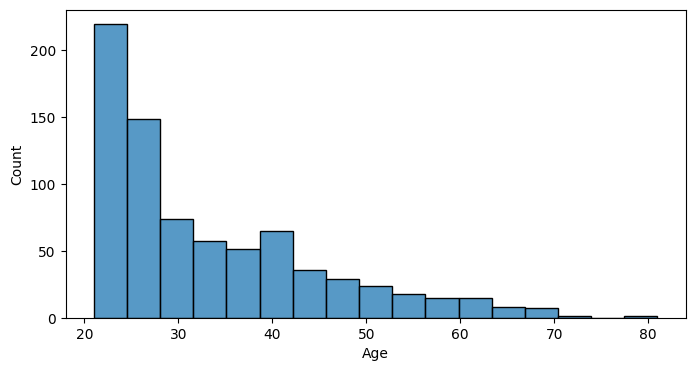

In [66]:
# Analisis de las variables numéricas

for num in numerica:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=num)
    plt.show()

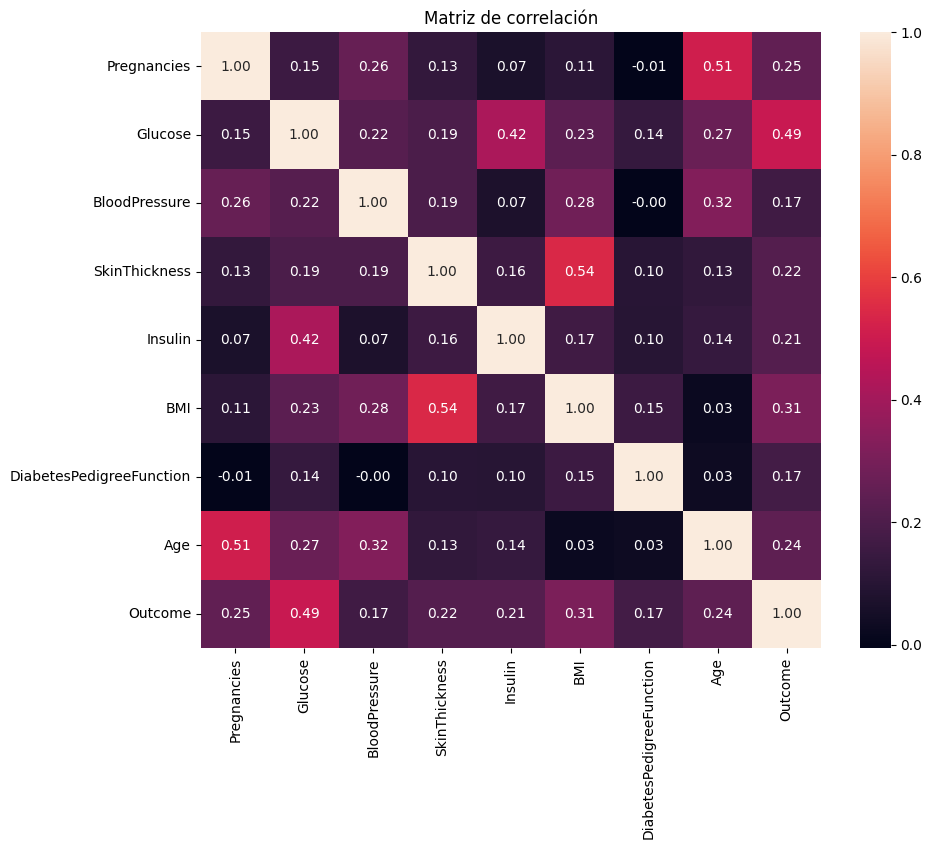

In [67]:
# Analisis multivariante
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt = '.2f')
plt.title('Matriz de correlación')
plt.show()

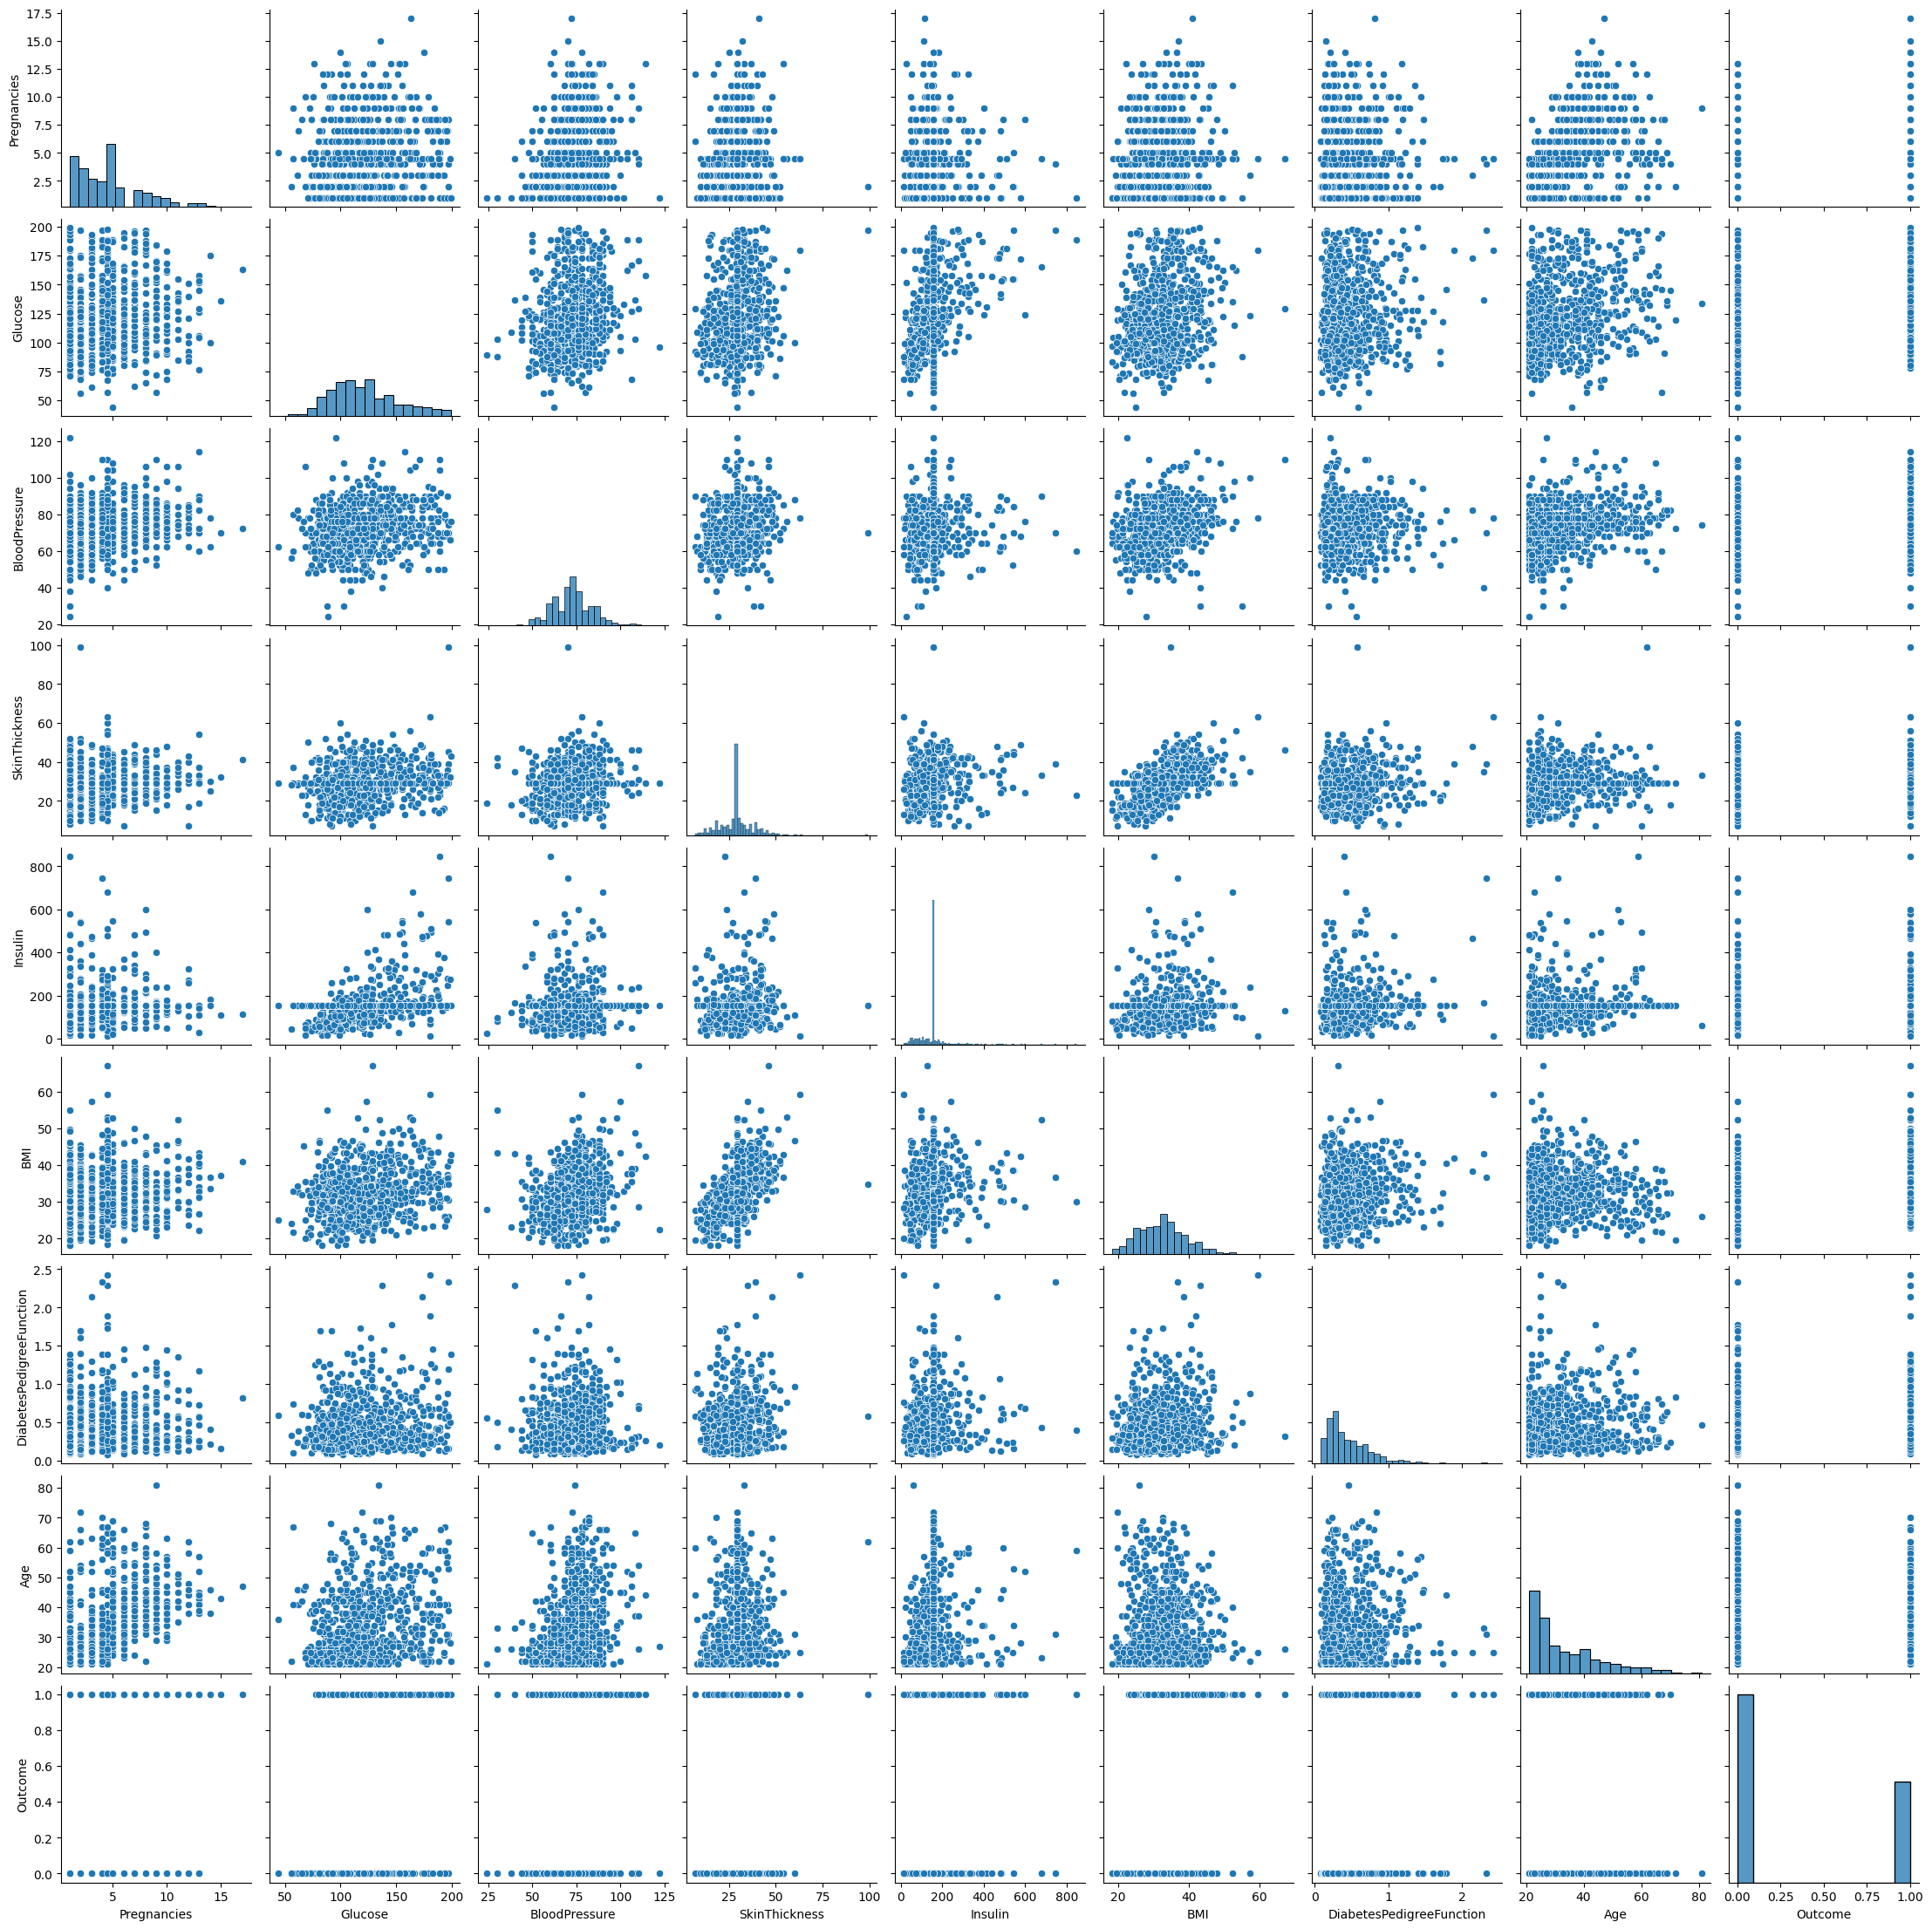

In [68]:
sns.pairplot(df)
plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


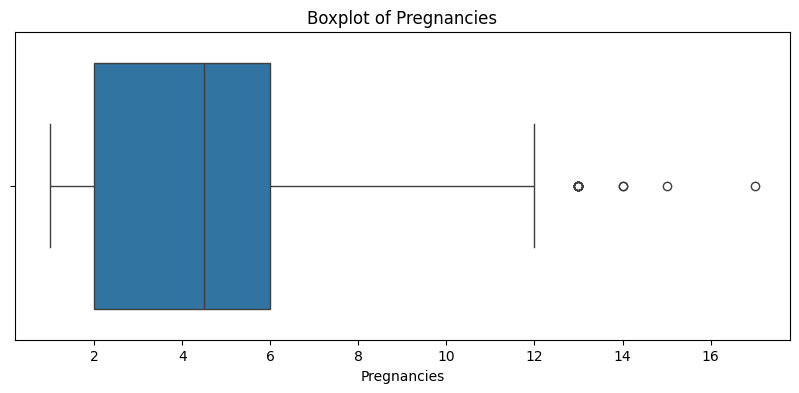

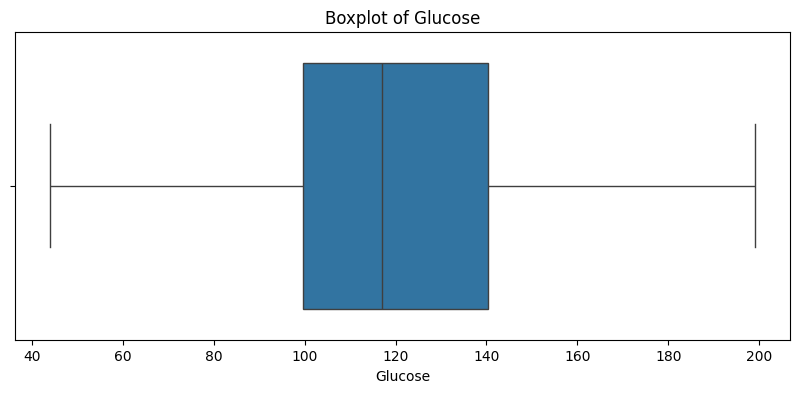

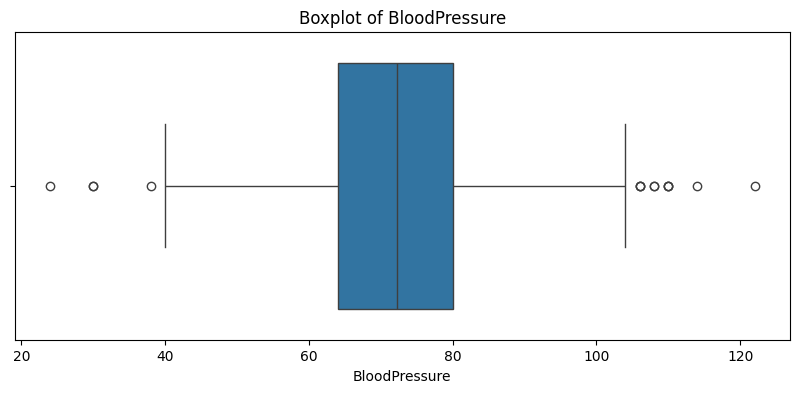

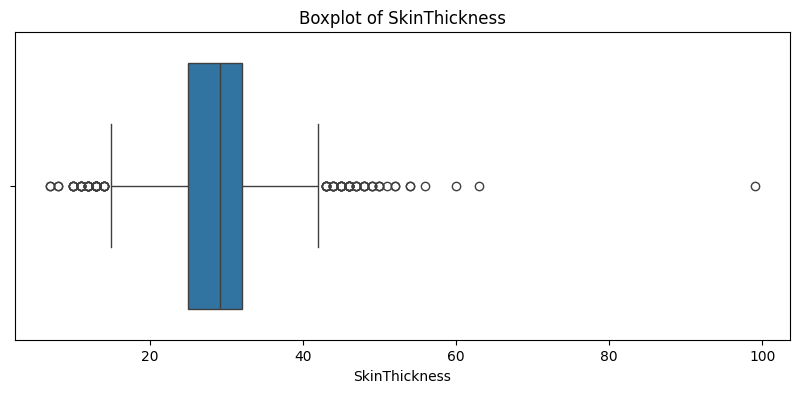

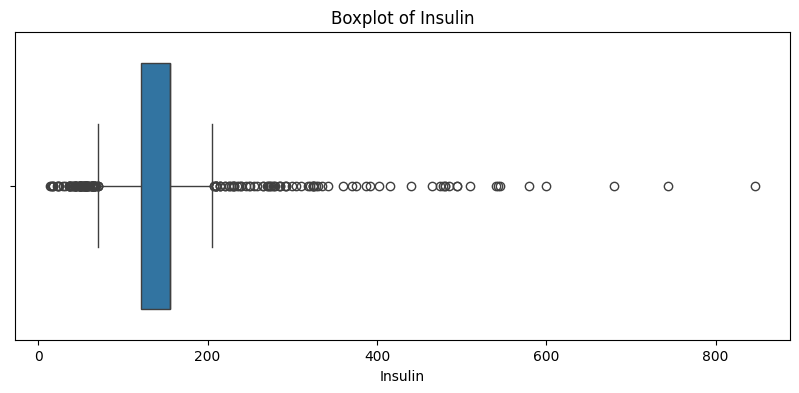

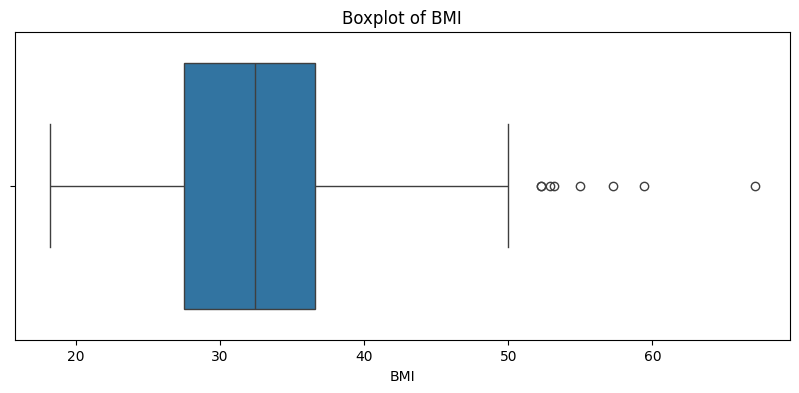

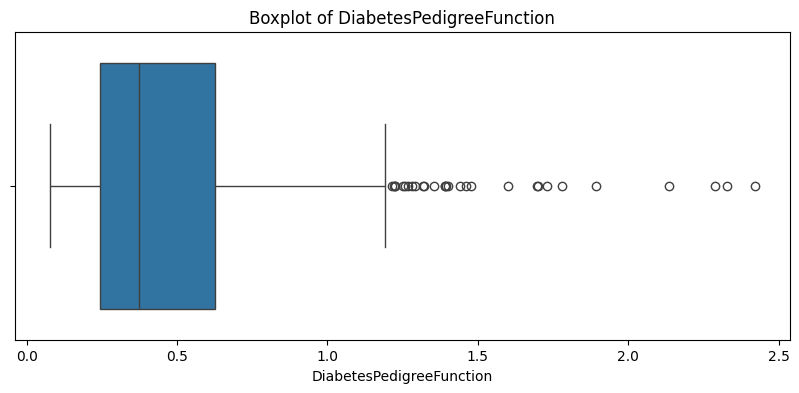

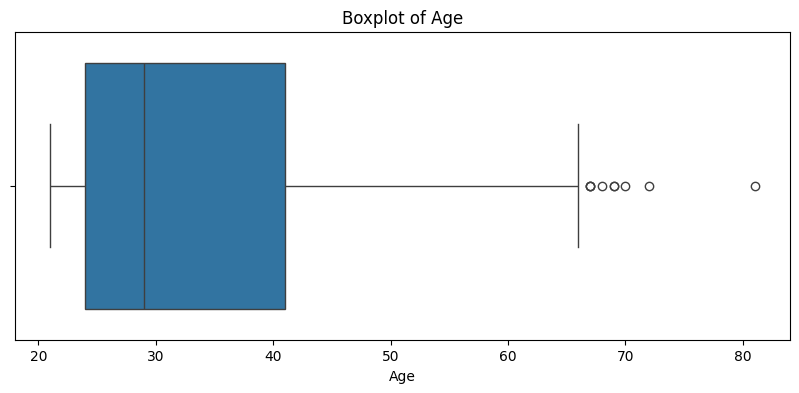

In [72]:
# Ingenieria de características
display(df.describe())
for col in df:
    if col != 'Outcome':
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

In [73]:
# Selección de características
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['Outcome'])
y = df['Outcome']

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
selected_cols = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_cols))

Características seleccionadas: ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']


In [81]:
# Con las mejores variables, entrenamos el modelo
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.000000,84.0,72.405184,29.15342,155.548223,32.457464,0.304,21.0
618,9.000000,112.0,82.000000,24.00000,155.548223,28.200000,1.282,50.0
346,1.000000,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22.0
294,4.494673,161.0,50.000000,29.15342,155.548223,21.900000,0.254,65.0
231,6.000000,134.0,80.000000,37.00000,370.000000,46.200000,0.238,46.0


In [82]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


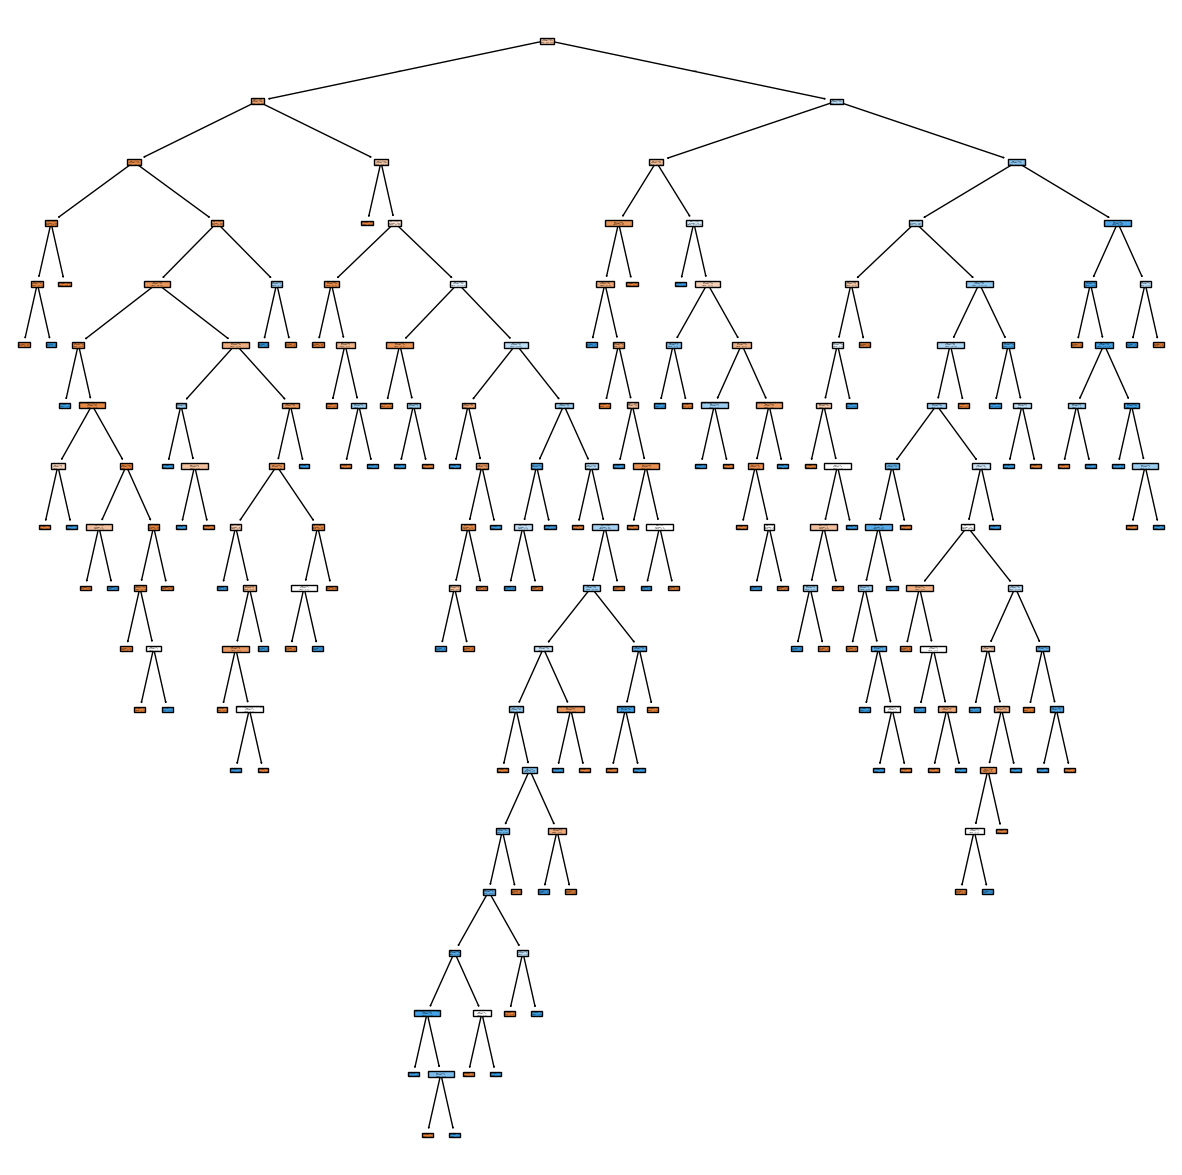

In [83]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)

plt.show()

In [84]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

Accuracy del modelo: 0.7012987012987013


In [87]:
params_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [89]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, params_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [90]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [92]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_score(y_test, y_pred_best) 

0.7727272727272727

In [93]:
from pickle import dump
dump(best_model, open('../models/decision_tree_model_entropy_max_depth_3_min_samples_split_2_42.sav', 'wb'))



El análisis realizado permitió limpiar y explorar el conjunto de datos de diabetes, identificar las variables más relevantes y entrenar un modelo de árbol de decisión para predecir el diagnóstico de diabetes. Tras la optimización de hiperparámetros mediante GridSearchCV, se obtuvo un modelo con una precisión de aproximadamente 77%. Este resultado indica que el modelo es capaz de clasificar correctamente la mayoría de los casos, aunque existe margen de mejora. La selección de características y el tratamiento de valores atípicos y nulos fueron pasos clave para mejorar el desempeño del modelo. En futuros trabajos se pueden explorar otros algoritmos y técnicas de ingeniería de características para incrementar la precisión.